In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from missingpy import KNNImputer
from matplotlib import pyplot as plt
%matplotlib inline

# Importing the test  and train data

In [2]:
test_data=pd.read_csv("C:/Shakeer/ML/Assignment1_PGD B7/Test.csv")
train_data=pd.read_csv("C:/Shakeer/ML/Assignment1_PGD B7/Train.csv")

In [3]:
test_data.shape #test data has 5681 rows and 11 columns

(5681, 11)

In [4]:
train_data.shape #train data has 8523 rows and 12 columns

(8523, 12)

# Null Values
- from the below info we can get to know that the columns which are having Null values are "Item_Weight" and "Outlet_Size"
- the heatmap graph shows the same info visually.

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


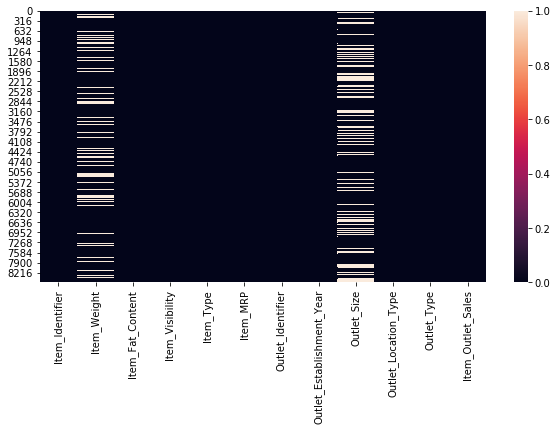

In [6]:
import seaborn as sb
plt.rcParams['figure.figsize']=[10,5]
fig=plt.figure()
sb.heatmap(train_data.isnull(), cbar=True)

### Considering Independent features for furthur analysis

In [7]:
train_data1=train_data.drop(['Item_Outlet_Sales'],axis=1)
train_data1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [8]:
#data.to_csv("C:/Shakeer/ML/Assignment1_PGD B7/Full_Data1.csv")

# Data Cleaning
   - 1) Converting to Numerical form using LabelEncoder
   - 2) Making Changes to Outlet_Size and Item_Fat_Content
   - 3) Converting remaining columns using get_dummies

# Step-1

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
lb=LabelEncoder()

In [11]:
train_data1['Outlet_Type']=pd.DataFrame(lb.fit_transform(train_data1['Outlet_Type']))

In [12]:
train_data1['Outlet_Location_Type']=pd.DataFrame(lb.fit_transform(train_data1['Outlet_Location_Type']))

In [13]:
train_data1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,0,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,2,2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,0,1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,2,0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,2,1


# Step-2
  ### for Outlet_Size Column
  - Assigning values 0,1 and 2 to the column "Outlet_Size" values Small,Medium and High respectively
  - The main aim of assigning values is to predict nan values by KNN Imputator

In [14]:
train_data1['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [15]:
train_data1.Outlet_Size[train_data1['Outlet_Size']=='Small']=0 
train_data1.Outlet_Size[train_data1['Outlet_Size']=='Medium']=1
train_data1.Outlet_Size[train_data1['Outlet_Size']=='High']=2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### for Item_Fat_Content Columns
- The columns contain 'Low Fat', 'Regular', 'low fat', 'LF', 'reg' where 'Low Fat'= 'low fat'= 'LF' and 'Regular'='reg'
- Converting the entire column values to lower case
- And Replacing 'lf' with 'low fat' and 'reg' with 'regular'

In [16]:
train_data1['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [17]:
train_data1['Item_Fat_Content']=train_data1.Item_Fat_Content.str.lower()

In [18]:
train_data1.Item_Fat_Content[train_data1['Item_Fat_Content']=='lf']='low fat'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
train_data1.Item_Fat_Content[train_data1['Item_Fat_Content']=='reg']='regular'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
train_data1['Item_Fat_Content'].unique()

array(['low fat', 'regular'], dtype=object)

In [21]:
train_data1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,1,0,1
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,1,0,1
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,2,0
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,2,2,1


# Dropping Unnecessary Columns 
- We have to drop unwanted columns where it doesn't have any impact on the dependent columns which we want to predict
- Keeping those columns may affect in getting less accuracy.

In [22]:
mod_data=train_data1.drop(['Item_Identifier'],axis=1)

In [23]:
mod_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,1,0,1
1,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2
2,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,1,0,1
3,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,2,0
4,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,2,2,1


# Converting to numerical data using get_dummies

In [24]:
conv_data=pd.get_dummies(mod_data)

In [25]:
conv_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_low fat,Item_Fat_Content_regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2
0,9.30,0.016047,249.8092,1999,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5.92,0.019278,48.2692,2009,2,2,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,17.50,0.016760,141.6180,1999,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,19.20,0.000000,182.0950,1998,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,1987,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Null Values
- from the below info we can get to know that the columns which are having Null values are "Item_Weight"
- the heatmap graph shows the same info visually.

In [26]:
conv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 37 columns):
Item_Weight                        7060 non-null float64
Item_Visibility                    8523 non-null float64
Item_MRP                           8523 non-null float64
Outlet_Establishment_Year          8523 non-null int64
Outlet_Location_Type               8523 non-null int32
Outlet_Type                        8523 non-null int32
Item_Fat_Content_low fat           8523 non-null uint8
Item_Fat_Content_regular           8523 non-null uint8
Item_Type_Baking Goods             8523 non-null uint8
Item_Type_Breads                   8523 non-null uint8
Item_Type_Breakfast                8523 non-null uint8
Item_Type_Canned                   8523 non-null uint8
Item_Type_Dairy                    8523 non-null uint8
Item_Type_Frozen Foods             8523 non-null uint8
Item_Type_Fruits and Vegetables    8523 non-null uint8
Item_Type_Hard Drinks              8523 non-null uint8
Item_Ty

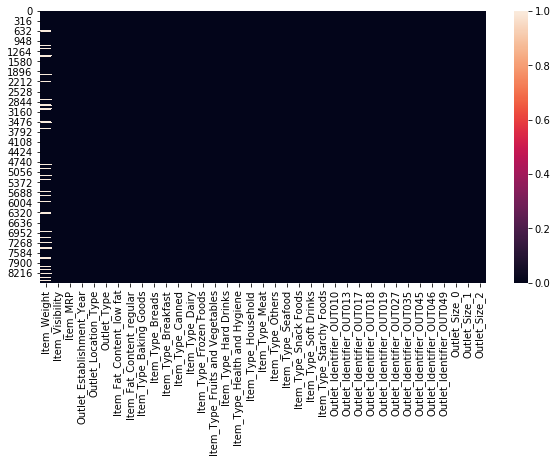

In [27]:
import seaborn as sb
plt.rcParams['figure.figsize']=[10,5]
fig=plt.figure()
sb.heatmap(conv_data.isnull(), cbar=True)

# KNN Imputer
- For filling the null values we use KNN Imputer model where it will predict the null values based on all the non null values 
- We are giving the nearest neighbors count(default count) as 5 and sending the data which we want to fill all the required null vales with predicted values 

In [28]:
from missingpy import KNNImputer

In [29]:
comp_data=pd.DataFrame(KNNImputer(n_neighbors=5).fit_transform(conv_data))

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\missingpy\utils.py:124: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


### Assigning column names to the new data set

In [30]:
comp_data.columns=conv_data.columns

In [31]:
comp_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_low fat,Item_Fat_Content_regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2
0,9.30,0.016047,249.8092,1999.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,5.92,0.019278,48.2692,2009.0,2.0,2.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,17.50,0.016760,141.6180,1999.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,19.20,0.000000,182.0950,1998.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.93,0.000000,53.8614,1987.0,2.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Checking for outliers for numerical columns
   - from the boxplot we got to know that the columns 'Item_Visibility' and Item_Outlet_Sales have more outliers
   - We will try to reduce/remove these Outliers.

([<matplotlib.axis.XTick at 0x141b6b15cf8>],
 <a list of 1 Text xticklabel objects>)

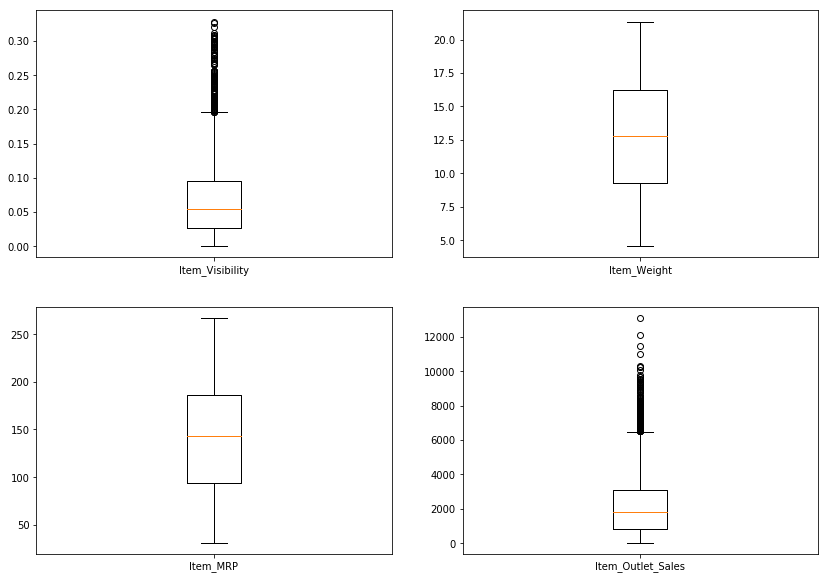

In [32]:
plt.rcParams['figure.figsize']=[14,10]
fig=plt.figure()
plt.subplot(2,2,1)
plt.boxplot(comp_data['Item_Visibility'])
plt.xticks([1],['Item_Visibility'])

plt.subplot(2,2,2)
plt.boxplot(comp_data['Item_Weight'])
plt.xticks([1],['Item_Weight'])

plt.subplot(2,2,3)
plt.boxplot(comp_data['Item_MRP'])
plt.xticks([1],['Item_MRP'])

plt.subplot(2,2,4)
plt.boxplot(train_data['Item_Outlet_Sales'])
plt.xticks([1],['Item_Outlet_Sales'])

# Checking the skewness of all columns of data
- need to reduce the skewness by applying the appropriate transformations

In [33]:
comp_data.skew()

Item_Weight                         0.071865
Item_Visibility                     1.167091
Item_MRP                            0.127202
Outlet_Establishment_Year          -0.396641
Outlet_Location_Type               -0.209093
Outlet_Type                         0.927438
Item_Fat_Content_low fat           -0.616705
Item_Fat_Content_regular            0.616705
Item_Type_Baking Goods              3.199792
Item_Type_Breads                    5.567533
Item_Type_Breakfast                 8.632562
Item_Type_Canned                    3.196644
Item_Type_Dairy                     3.096356
Item_Type_Frozen Foods              2.659119
Item_Type_Fruits and Vegetables     2.021988
Item_Type_Hard Drinks               6.071724
Item_Type_Health and Hygiene        3.668801
Item_Type_Household                 2.547106
Item_Type_Meat                      4.136741
Item_Type_Others                    6.889767
Item_Type_Seafood                  11.411629
Item_Type_Snack Foods               2.065882
Item_Type_

# Checking the skewness visually
- Item_Visibility and Item_Outlet_Sales are right skewed

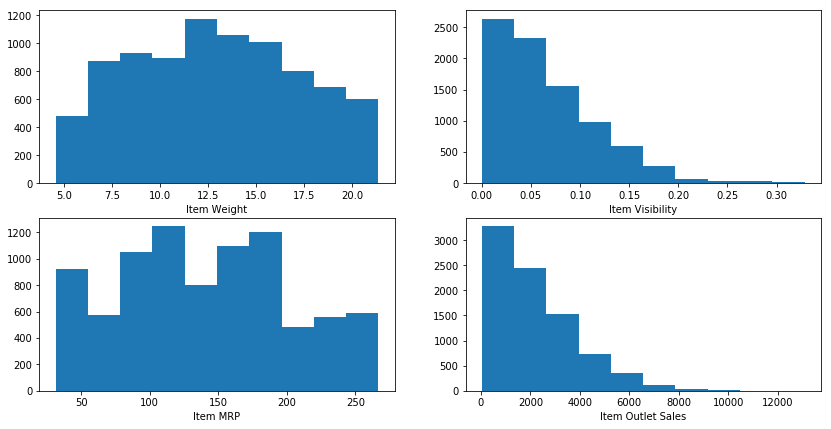

In [34]:

plt.rcParams['figure.figsize']=[14,7]
fig=plt.figure()
#plt.subplot(rows,columns,for which u r drawing this)
plt.subplot(2,2,1)
plt.hist(comp_data['Item_Weight'])
plt.xlabel('Item Weight')

plt.subplot(2,2,2)
plt.hist(comp_data['Item_Visibility'])
plt.xlabel('Item Visibility')

plt.subplot(2,2,3)
plt.hist(comp_data['Item_MRP'])
plt.xlabel('Item MRP')

plt.subplot(2,2,4)
plt.hist(train_data['Item_Outlet_Sales'])
plt.xlabel('Item Outlet Sales')

plt.show()

## Applying appropriate transformations on the numerical columns and choose the best skewness value which can improve the accuracy

In [35]:
np.sqrt(comp_data['Item_Weight']).skew()

-0.20041020406287086

In [36]:
np.sqrt(comp_data['Item_MRP']).skew()

-0.2838919895961916

In [37]:
np.sqrt(comp_data['Item_Visibility']).skew()

-0.09805554671154018

In [38]:
np.cbrt(train_data['Item_Outlet_Sales']).skew()

-0.10250699736722735

### Applying the choosen transformations on the required columns

In [39]:
comp_data['Item_MRP']=np.sqrt(comp_data['Item_MRP'])

In [40]:
comp_data['Item_Visibility']=np.sqrt(comp_data['Item_Visibility'])

#### Applying transformation for dependent columns 'Item_Outlet_Sales'

In [41]:
train_data['Item_Outlet_Sales']=np.cbrt(train_data['Item_Outlet_Sales'])

### Plotting the Histogram for  'Item_Visibility','Item_MRP', 'Item_Outlet_Sales'  to check the skewness after applying transformations

In [42]:
comp_data.skew()

Item_Weight                         0.071865
Item_Visibility                    -0.098056
Item_MRP                           -0.283892
Outlet_Establishment_Year          -0.396641
Outlet_Location_Type               -0.209093
Outlet_Type                         0.927438
Item_Fat_Content_low fat           -0.616705
Item_Fat_Content_regular            0.616705
Item_Type_Baking Goods              3.199792
Item_Type_Breads                    5.567533
Item_Type_Breakfast                 8.632562
Item_Type_Canned                    3.196644
Item_Type_Dairy                     3.096356
Item_Type_Frozen Foods              2.659119
Item_Type_Fruits and Vegetables     2.021988
Item_Type_Hard Drinks               6.071724
Item_Type_Health and Hygiene        3.668801
Item_Type_Household                 2.547106
Item_Type_Meat                      4.136741
Item_Type_Others                    6.889767
Item_Type_Seafood                  11.411629
Item_Type_Snack Foods               2.065882
Item_Type_

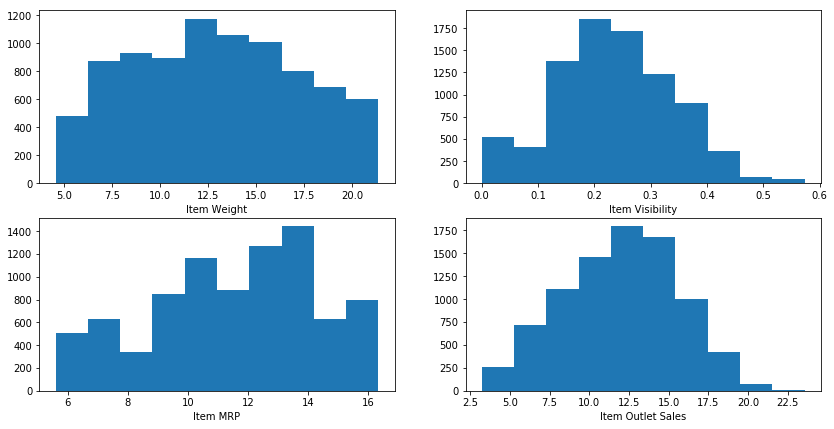

In [43]:
plt.rcParams['figure.figsize']=[14,7]
fig=plt.figure()
#plt.subplot(rows,columns,for which u r drawing this)
plt.subplot(2,2,1)
plt.hist(comp_data['Item_Weight'])
plt.xlabel('Item Weight')

plt.subplot(2,2,2)
plt.hist(comp_data['Item_Visibility'])
plt.xlabel('Item Visibility')

plt.subplot(2,2,3)
plt.hist(comp_data['Item_MRP'])
plt.xlabel('Item MRP')

plt.subplot(2,2,4)
plt.hist(train_data['Item_Outlet_Sales'])
plt.xlabel('Item Outlet Sales')

plt.show()

# Now Checking the box plots
- The Outliers got reduced for both Item_Visibility and Item_Outlet_Sales when compared to before and after applying transformations.

([<matplotlib.axis.XTick at 0x141b9303f28>],
 <a list of 1 Text xticklabel objects>)

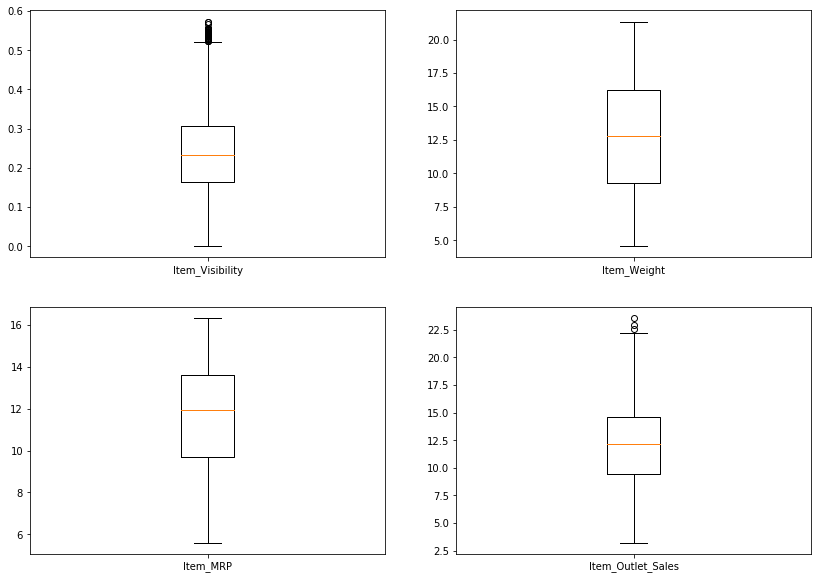

In [44]:
plt.rcParams['figure.figsize']=[14,10]
fig=plt.figure()
plt.subplot(2,2,1)
plt.boxplot(comp_data['Item_Visibility'])
plt.xticks([1],['Item_Visibility'])

plt.subplot(2,2,2)
plt.boxplot(comp_data['Item_Weight'])
plt.xticks([1],['Item_Weight'])

plt.subplot(2,2,3)
plt.boxplot(comp_data['Item_MRP'])
plt.xticks([1],['Item_MRP'])

plt.subplot(2,2,4)
plt.boxplot(train_data['Item_Outlet_Sales'])
plt.xticks([1],['Item_Outlet_Sales'])

# Removing Outliers for Item_Outlet_Sales
- Calculating Upper Boundary(UB) and Lower Boundary(LB)
- Finding IQR value
- Cliiping the outliers with UB and LB respectively
- Checking the box plot whether outliers removed or not

In [45]:
a=train_data['Item_Outlet_Sales'].quantile([0.25,0.75])
l=a.tolist()
l

[9.413799044012782, 14.583029634673236]

In [46]:
IQR=l[1]-l[0]
IQR

5.1692305906604545

In [47]:
UB=l[1]+1.5*IQR
LB=l[0]-1.5*IQR
print(UB)
print(LB)

22.336875520663916
1.6599531580221


In [48]:
train_data['Item_Outlet_Sales']=train_data['Item_Outlet_Sales'].clip_upper(UB)
train_data['Item_Outlet_Sales']=train_data['Item_Outlet_Sales'].clip_lower(LB)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  


([<matplotlib.axis.XTick at 0x141b9546be0>],
 <a list of 1 Text xticklabel objects>)

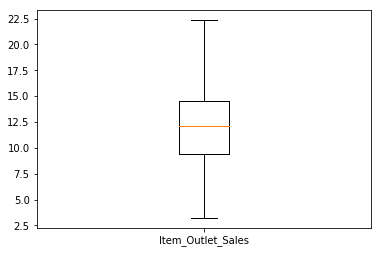

In [49]:
plt.rcParams['figure.figsize']=[6,4]
fig=plt.figure()
plt.boxplot(train_data['Item_Outlet_Sales'])
plt.xticks([1],['Item_Outlet_Sales'])

# Now that we performed data cleaning and filled 'Nan' using KNN Imputer and a converted the categorical columns to numerical columns using Label Encoder and get_dummies.
# Its time to build the Linear regression model
  - Taking Independent Features and Dependent Features and assigning to seperate variables x and y respectively

In [50]:
x=comp_data
y=train_data['Item_Outlet_Sales']
x.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_low fat,Item_Fat_Content_regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2
0,9.30,0.126678,15.805354,1999.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,5.92,0.138846,6.947604,2009.0,2.0,2.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,17.50,0.129461,11.900336,1999.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,19.20,0.000000,13.494258,1998.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.93,0.000000,7.339033,1987.0,2.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
# Splitting the data to test and train data
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=3)
#Model Initialization
reg=LinearRegression(normalize=False)
#Data Fitting
reg=reg.fit(x_train,y_train)
print('Coefficient: ',reg.coef_)
print('Intercept: ',reg.intercept_)

Coefficient:  [ 3.21867661e-03 -1.71159784e-01  7.19040657e-01 -9.62564933e+10
  3.82409462e+10 -6.82196364e+10 -2.08849095e+10 -2.08849095e+10
 -1.14477229e+09 -1.14477229e+09 -1.14477229e+09 -1.14477229e+09
 -1.14477229e+09 -1.14477229e+09 -1.14477229e+09 -1.14477229e+09
 -1.14477229e+09 -1.14477229e+09 -1.14477229e+09 -1.14477229e+09
 -1.14477229e+09 -1.14477229e+09 -1.14477229e+09 -1.14477229e+09
 -1.86037900e+11 -6.02831906e+11  7.86731123e+11  1.06702098e+12
 -1.10669270e+12 -1.17491522e+12  7.52159365e+11  3.05448656e+11
  1.16604858e+11  1.12718306e+11 -2.54197723e+11 -5.77981840e+10
 -5.73807784e+11]
Intercept:  192452059381418.72


In [52]:
y_pred=reg.predict(x_test)
print(y_pred**3)

[2671.15429688 1852.36990356  634.67025757 ... 2780.91430664 1909.50845337
  990.65426636]


# Model Evaluation

In [53]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print("RMSE= ",rmse)
print("R2 Score= ",r2)

RMSE=  1.9172558216356237
R2 Score=  0.7249024339098729


- In this case, R-Square is 72.4%. This means, 72.4% of varaince in Item_Outlet_Sales is expalined by all the independent features. In other words, you will have 72.4% information to make an accurate prediction about the Item_Outlet_Sales.

In [54]:
rmse1=np.sqrt(mean_squared_error(y_test**3,y_pred**3))
r2s=r2_score(y_test**3,y_pred**3)
print("RMSE= ",rmse1)
print("R2 Score= ",r2s)

RMSE=  1056.2006750642379
R2 Score=  0.6253719218408555


In [55]:
y_pred**3

array([2671.15429688, 1852.36990356,  634.67025757, ..., 2780.91430664,
       1909.50845337,  990.65426636])

In [56]:
y_test**3

4258    2865.6032
2574    2607.2728
517      372.8480
3004     850.8924
2159     164.4526
891     1043.9744
957     1798.9916
1374    2518.7214
2485     633.8416
6036    3749.7856
1054    1418.1540
4745    3361.6242
685     5954.2494
5049     502.0132
4666    2890.9036
6505    1917.5040
94      1274.3412
2098    2801.6864
1674    1231.7300
2674    3425.5410
4005    5070.7328
3504    4122.6336
7005     484.7024
591     3643.2576
2947    2548.6824
7350    3950.1914
1340    1850.9240
4089    2649.2182
3893    6199.9296
2040    6309.7866
          ...    
617      484.7024
1873     294.2836
1801    2360.9268
4989    1569.9564
362      878.8560
5822    1860.2452
5072    2631.2416
4180    1069.2748
72      4604.6728
2959    1358.2320
1593    4514.1240
1051    1810.9760
6524     703.0848
6050    6303.7944
7450    2407.5328
7940    5704.5744
255       41.2796
6980    2836.3080
4357    2693.8268
2951    2423.5120
4740    2805.0154
1041    3542.0560
7292    1713.1034
7954    1384.1982
447      7

# Residual Plot
- As the plot is not following any pattern and the points are randomly dispersed we can tell that it is suitable for linear regression model.

Text(0.5, 1.0, 'Residual Plot for Linear Regression')

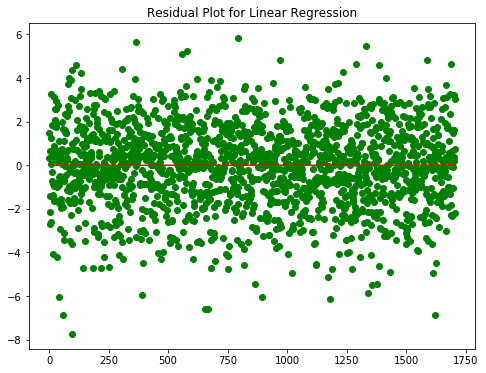

In [57]:
plt.rcParams['figure.figsize']=[8,6]
fig=plt.figure()
x=[i for i in range(1,len(y_pred)+1)]
x_plot=plt.scatter(x,(y_test-y_pred),c='g')
plt.plot(x,[0]*len(y_pred),c='r')
plt.title("Residual Plot for Linear Regression")

In [58]:
from statsmodels.formula.api import OLS
reg=OLS(y_train,x_train).fit()

In [59]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     528.4
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        23:02:42   Log-Likelihood:                -14392.
No. Observations:                6818   AIC:                         2.884e+04
Df Residuals:                    6789   BIC:                         2.904e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Item_Weight                         0.0032      0.006      0.569      0.570      -0.008       0.014
Item_Visibility                    -0.1363      0.232     -0.588      0.557      -0.591       0.318
Item_MRP                            0.7191      0.009     81.445      0.000       0.702       0.736
Outlet_Establishment_Year           0.0008   7.39e-05     10.975      0.000       0.001       0.001
Outlet_Location_Type               -0.8143      0.029    -27.765      0.000      -0.872      -0.757
Outlet_Type                         2.5358      0.032     79.939      0.000       2.474       2.598
Item_Fat_Content_low fat           -0.0540      0.028     -1.933      0.053      -0.109       0.001
Item_Fat_Content_regular            0.0316      0.028      1.131      0.258      -0.023       0.086
Item_Type_Baking Goods             -0.0279      0.090     -0.310      0.756      -0.205       0.149
Item_Type_Breads                    0.1250      0.136      0.918      0.358      -0.142       0.392
Item_Type_Breakfast                -0.2282      0.201     -1.134      0.257      -0.623       0.166
Item_Type_Canned                   -0.0035      0.090     -0.039      0.969      -0.180       0.173
Item_Type_Dairy                    -0.0676      0.087     -0.775      0.438      -0.239       0.103
Item_Type_Frozen Foods             -0.1452      0.080     -1.815      0.070      -0.302       0.012
Item_Type_Fruits and Vegetables    -0.0007      0.069     -0.011      0.992      -0.137       0.135
Item_Type_Hard Drinks               0.0063      0.148      0.043      0.966      -0.283       0.296
Item_Type_Health and Hygiene        0.0076      0.102      0.075      0.940      -0.192       0.207
Item_Type_Household                -0.0884      0.080     -1.109      0.268      -0.245       0.068
Item_Type_Meat                      0.0120      0.108      0.111      0.912      -0.201       0.224
Item_Type_Others                    0.0536      0.164      0.326      0.744      -0.269       0.376
Item_Type_Seafood                   0.4113      0.265      1.554      0.120      -0.108       0.930
Item_Type_Snack Foods              -0.0684      0.069     -0.990      0.322      -0.204       0.067
Item_Type_Soft Drinks              -0.0052      0.108     -0.048      0.962      -0.217       0.207
Item_Type_Starchy Foods            -0.0032      0.173     -0.018      0.985      -0.341       0.335
Outlet_Identifier_OUT010           -1.6303      0.050    -32.653      0.000      -1.728      -1.532
Outlet_Identifier_OUT013            0.8436      0.037     22.820      0.000       0.771       0.916
Outlet_Identifier_OUT017            1.0309      0.063     16.443      0.000       0.908       1.154
Outlet_Identifier_OUT018           -0.8849      0.057    -15.487      0.000      -0

## Lasso Regression for different alpha values

In [60]:
R2S=[]
RMSE=[]
alpha=[]
alpha_range=[0.1,0.01,0.005,0.5,1,5,10,20,0.0001]
for i in alpha_range:
    lassoReg=Lasso(alpha=i,normalize=False)
    lassoReg.fit(x_train,y_train)
    pred=lassoReg.predict(x_test)
    rmse=np.sqrt(mean_squared_error(y_test**3,pred**3))
    r2=r2_score(y_test**3,pred**3)
    RMSE.append(rmse)
    R2S.append(r2)
    alpha.append(i)
x=pd.Series(alpha)
y=pd.Series(RMSE)
z=pd.Series(R2S)
df=pd.concat([x,y,z],axis=1)
df.columns=['alpha','RMSE','R2S']
df

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11931.354511506843, tolerance: 8.651090231702451
  positive)


,alpha,RMSE,R2S
0,0.1000,1124.926647,0.575032
1,0.0100,1063.672608,0.620053
2,0.0050,1061.689419,0.621468
3,0.5000,1275.464315,0.453684
4,1.0000,1404.008749,0.338017
5,5.0000,1743.696447,-0.021055
6,10.0000,1785.341987,-0.070410
7,20.0000,1785.341987,-0.070410
8,0.0001,1060.664236,0.622199


Text(0.5, 1.0, 'Residual Plot for Lasso Regression')

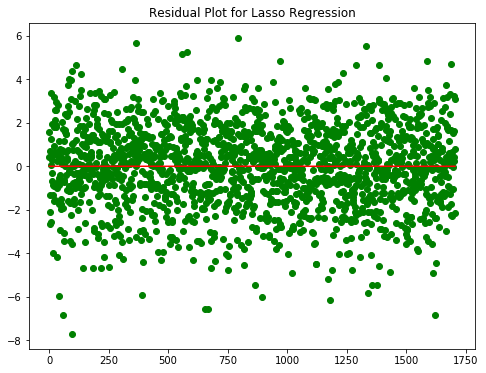

In [61]:
x=[i for i in range(1,len(pred)+1)]
x_plot=plt.scatter(x,(y_test-pred),c='g')
plt.plot(x,[0]*len(pred),c='r')
plt.title("Residual Plot for Lasso Regression")

## Ridge Regression for different alpha values

In [62]:
R2S=[]
RMSE=[]
alpha=[]
alpha_range=[0.1,0.01,0.005,0.5,1,5,10,20,0.0001]
for i in alpha_range:
    ridgeReg=Ridge(alpha=i,normalize=False)
    ridgeReg.fit(x_train,y_train)
    pred=ridgeReg.predict(x_test)
    rmse=np.sqrt(mean_squared_error(y_test**3,pred**3))
    r2=r2_score(y_test**3,pred**3)
    RMSE.append(rmse)
    R2S.append(r2)
    alpha.append(i)
x=pd.Series(alpha)
y=pd.Series(RMSE)
z=pd.Series(R2S)
df=pd.concat([x,y,z],axis=1)
df.columns=['alpha','RMSE','R2S']
df

,alpha,RMSE,R2S
0,0.1000,1060.707925,0.622168
1,0.0100,1060.701465,0.622172
2,0.0050,1060.701106,0.622173
3,0.5000,1060.736729,0.622147
4,1.0000,1060.772933,0.622121
5,5.0000,1061.069925,0.621910
6,10.0000,1061.457009,0.621634
7,20.0000,1062.271740,0.621053
8,0.0001,1060.700754,0.622173


Text(0.5, 1.0, 'Residual Plot For Ridge Regression')

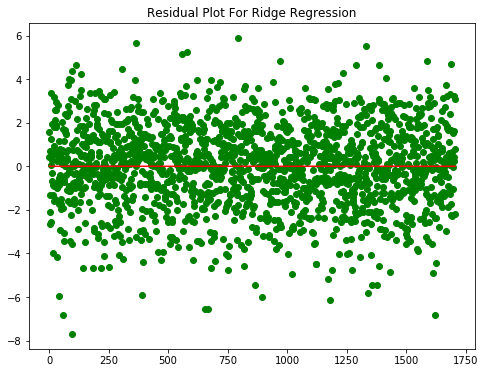

In [63]:
x=[i for i in range(1,len(pred)+1)]
x_plot=plt.scatter(x,(y_test-pred),c='g')
plt.plot(x,[0]*len(pred),c='r')
plt.title("Residual Plot For Ridge Regression")

# Which Model is best to use and why?

### Compared to Linear Regression model, Lasso Regression Model and Ridge Regression Model, Linear Regression is the best Model used to predict the Item_Outlet_Sales for this dataset
### Linear Regression accuracy and RMSE is better when compared to Lasso and Ridge Regression accuracies and RMSE's for different alpha values

# Data Cleaning and Filling Nan Values and converting categorical to numerical for test data
 ### We have to clean the data and apply transformations as we have done for train data

In [64]:
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


   - 1) Converting to Numerical form using LabelEncoder
   - 2) Making Changes to Outlet_Size and Item_Fat_Content
   - 3) Converting remaining columns using get_dummies

# Making Changes to Outlet_Size

In [65]:
test_data.Outlet_Size[test_data['Outlet_Size']=='Small']=0 
test_data.Outlet_Size[test_data['Outlet_Size']=='Medium']=1
test_data.Outlet_Size[test_data['Outlet_Size']=='High']=2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Label Encoding

In [66]:
test_data['Outlet_Location_Type']=pd.DataFrame(lb.fit_transform(test_data['Outlet_Location_Type']))

In [67]:
test_data['Outlet_Type']=pd.DataFrame(lb.fit_transform(test_data['Outlet_Type']))

In [68]:
test_data['Item_Fat_Content']=test_data.Item_Fat_Content.str.lower()

# Making Changes to Item_Fat_Content

In [69]:
test_data.Item_Fat_Content[test_data['Item_Fat_Content']=='lf']='low fat'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
test_data.Item_Fat_Content[test_data['Item_Fat_Content']=='reg']='regular'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [71]:
test_data['Item_Fat_Content'].unique()

array(['low fat', 'regular'], dtype=object)

In [72]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,low fat,0.007565,Snack Foods,107.8622,OUT049,1999,1,0,1
1,FDW14,8.300,regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,1,1
2,NCN55,14.600,low fat,0.099575,Others,241.7538,OUT010,1998,NaN,2,0
3,FDQ58,7.315,low fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,1,1
4,FDY38,NaN,regular,0.118599,Dairy,234.2300,OUT027,1985,1,2,3


# Dropping the same column as we have dropped in the train data

In [73]:
mod_test_data=test_data.drop(['Item_Identifier'],axis=1)

In [74]:
mod_test_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,low fat,0.007565,Snack Foods,107.8622,OUT049,1999,1,0,1
1,8.300,regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,1,1
2,14.600,low fat,0.099575,Others,241.7538,OUT010,1998,NaN,2,0
3,7.315,low fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,1,1
4,NaN,regular,0.118599,Dairy,234.2300,OUT027,1985,1,2,3


# Converting to numerical columns using get_dummies

In [75]:
conv_test_data=pd.get_dummies(mod_test_data)

In [76]:
conv_test_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_low fat,Item_Fat_Content_regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2
0,20.750,0.007565,107.8622,1999,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,8.300,0.038428,87.3198,2007,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14.600,0.099575,241.7538,1998,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.315,0.015388,155.0340,2007,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,0.118599,234.2300,1985,2,3,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [77]:
conv_test_data.shape

(5681, 37)

# Filling Nan values using KNN Imputer as that of we have done on train data

In [78]:
comp_test_data=pd.DataFrame(KNNImputer(n_neighbors=5).fit_transform(conv_test_data))

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)


In [79]:
comp_test_data.columns=conv_test_data.columns

In [80]:
comp_test_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_low fat,Item_Fat_Content_regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2
0,20.750,0.007565,107.8622,1999.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,8.300,0.038428,87.3198,2007.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14.600,0.099575,241.7538,1998.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.315,0.015388,155.0340,2007.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14.618,0.118599,234.2300,1985.0,2.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Applying same Transformations as that we have done to train data

In [81]:
comp_test_data['Item_MRP']=np.sqrt(comp_test_data['Item_MRP'])

In [82]:
comp_test_data['Item_Visibility']=np.sqrt(comp_test_data['Item_Visibility'])

# Now predicting the values of Outlet_Sales_Price using the best model i.e Linear Regression modelwe have build on train data

In [83]:
y_test_pred=reg.predict(comp_test_data)

In [84]:
print(y_pred**3)

[2671.15429688 1852.36990356  634.67025757 ... 2780.91430664 1909.50845337
  990.65426636]


# The Below are the predicted Item_Outlet_Sales values of test data

In [85]:
print(y_test_pred**3)

0       1655.219802
1       1354.018830
2        869.682604
3       2309.088091
4       5422.556601
5       1751.791345
6        674.444727
7       2200.621183
8       1359.254410
9       2825.439974
10      1796.794770
11      1215.616647
12       853.661855
13      1918.595875
14       824.970419
15      2335.789156
16      3133.440329
17      2512.262087
18      2746.195820
19       557.488229
20      2538.405488
21      3826.893873
22       734.388841
23       341.352854
24      2792.089801
25       664.713288
26       813.618086
27      2307.361590
28      3639.356747
29      1828.923895
           ...     
5651    2771.398031
5652    1783.896515
5653    1321.326001
5654    2074.044167
5655    3541.614423
5656    4775.350882
5657    3974.231651
5658    1770.321051
5659    2886.675787
5660    3141.622880
5661    3764.419658
5662    3238.835396
5663     929.517686
5664    2279.830198
5665    1474.655836
5666    2931.162137
5667    1204.298195
5668     215.959096
5669    4415.874143


In [86]:
comp_test_data['Predicted_Item_Outlet_Sales']=y_test_pred**3

In [87]:
comp_test_data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_low fat,Item_Fat_Content_regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Predicted_Item_Outlet_Sales
0,20.750,0.086976,10.385673,1999.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1655.219802
1,8.300,0.196030,9.344506,2007.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1354.018830
2,14.600,0.315555,15.548434,1998.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,869.682604
3,7.315,0.124050,12.451265,2007.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2309.088091
4,14.618,0.344383,15.304574,1985.0,2.0,3.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5422.556601
5,9.800,0.252621,10.823548,1997.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1751.791345
6,19.350,0.287405,7.078376,2009.0,2.0,2.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,674.444727
7,10.225,0.125628,9.003288,1985.0,2.0,3.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2200.621183
8,6.305,0.351234,9.784866,2002.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1359.254410
9,5.985,0.075488,13.670860,2007.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2825.439974
